In [1]:
import mne
#%gui qt
#import matplotlib

#%matplotlib qt
import numpy as np
from matplotlib import pyplot as plt
from stormdb.access import Query
from pickle import load
from scipy import stats
from mne.datasets import sample
from mne.stats import spatio_temporal_cluster_1samp_test
import os
import pickle
from copy import deepcopy
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
# os.environ['ETS_TOOLKIT'] = 'qt4'
# os.environ['QT_API'] = 'pyqt5'
# %gui qt
#mne.viz.set_3d_backend("notebook")

In [2]:
proj_name = 'MINDLAB2020_MEG-AuditoryPatternRecognition'
wdir = '/projects/' + proj_name + '/scratch/working_memory/'
stats_dir = wdir + 'results/stats/'
data_dir = wdir + 'averages/data/'

subs_dir = '/projects/' + proj_name + '/scratch/fs_subjects_dir/'
# sample_path = sample.data_path()
# sample_subjects_dir = sample_path + '/subjects'
src = mne.read_source_spaces(subs_dir + '0024_JSV/bem/0024_JSV_vol-src.fif')

    Reading a source space...
    [done]
    1 source spaces read


In [3]:
# Load a source time course
dfname = data_dir + '0024_JSV_TFR_src2_HFA.p'
dfile = open(dfname,'rb')
all_stc = pickle.load(dfile)
dfile.close()
# stc = deepcopy(all_stc['same'])
# del all_stc

# # load source morph
# morph = mne.read_source_morph(subs_dir + '0024_JSV/bem/0024_JSV_vol-morph.h5')
# stc = morph.apply(stc)
# print(stc)

same
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Showing: t = 2.630 s, (-39.5, -86.2, -24.8) mm, [7, 8, 8] vox, 10423 vertex
Using control points [0.46455356 0.54161304 0.7307589 ]


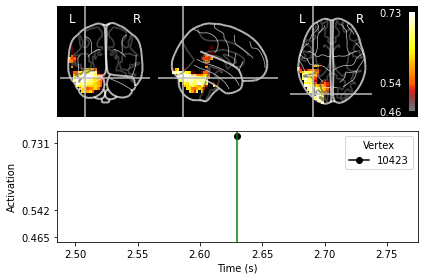

different
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Showing: t = 2.630 s, (-56.4, -56.0, -37.6) mm, [4, 15, 7] vox, 9366 vertex
Using control points [0.35957384 0.42030231 0.59718829]


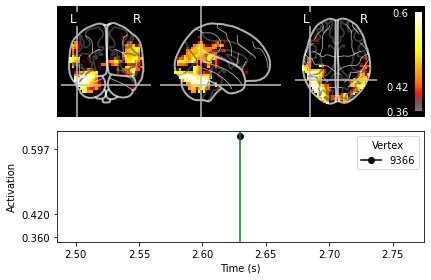

inverted
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Showing: t = 2.630 s, (-56.4, -56.0, -37.6) mm, [4, 15, 7] vox, 9366 vertex
Using control points [0.20604278 0.24404695 0.38255445]


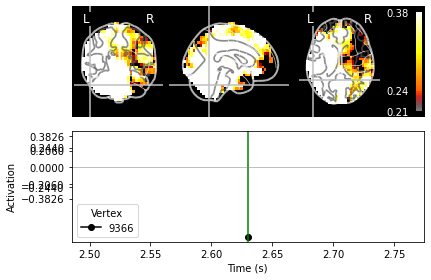

other
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Showing: t = 2.630 s, (-56.4, -56.0, -37.6) mm, [4, 15, 7] vox, 9366 vertex
Using control points [0.24444355 0.2899955  0.4401156 ]


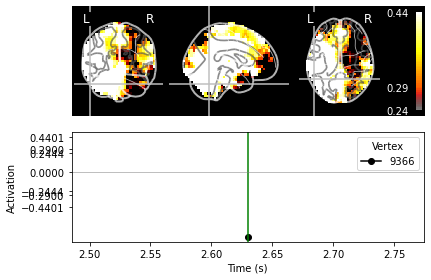

In [4]:
# Plot 1 stc
for s in all_stc:
        print('{}'.format(s))
        brain = all_stc[s].mean().plot(subjects_dir=subs_dir,#initial_time = pt,#clim={'kind': 'value', 'lims': [10,15,20]},#time_viewer=True,
                                mode = 'glass_brain',src = src)

same 2.0
Fixing initial time: 2.0 sec
Showing: t = 2.000 s, (-56.1, -8.5, -36.4) mm, [4, 15, 7] vox, 9366 vertex


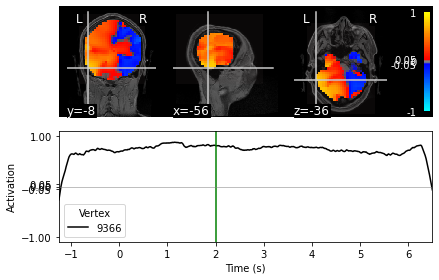

same 2.1
Fixing initial time: 2.1 sec
Showing: t = 2.100 s, (-56.1, -8.5, -36.4) mm, [4, 15, 7] vox, 9366 vertex


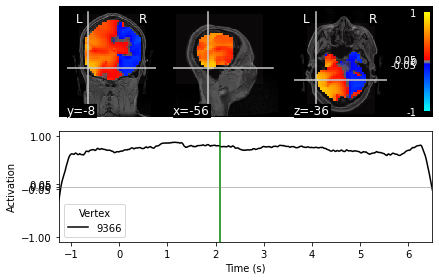

same 2.2
Fixing initial time: 2.2 sec
Showing: t = 2.200 s, (-46.1, -28.5, -31.4) mm, [6, 11, 8] vox, 10515 vertex


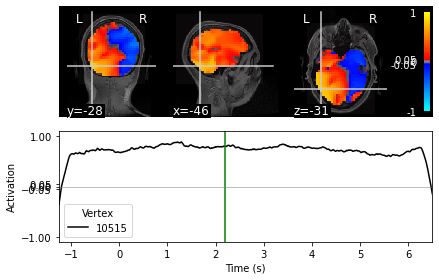

same 2.3000000000000003
Fixing initial time: 2.3000000000000003 sec
Showing: t = 2.300 s, (-56.1, -23.5, -26.4) mm, [4, 12, 9] vox, 11815 vertex


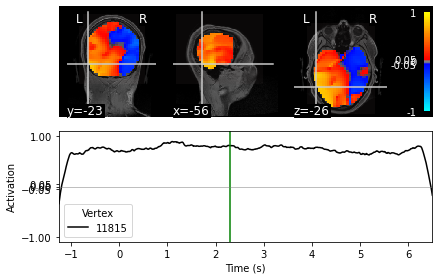

same 2.4000000000000004
Fixing initial time: 2.4000000000000004 sec
Showing: t = 2.400 s, (-21.1, -68.5, -26.4) mm, [11, 3, 9] vox, 11543 vertex


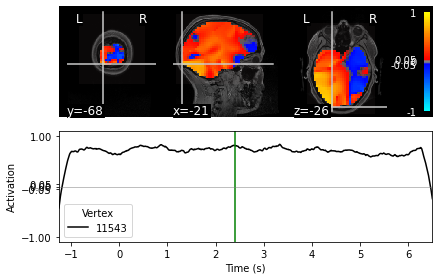

same 2.5000000000000004
Fixing initial time: 2.5000000000000004 sec
Showing: t = 2.500 s, (-41.1, -43.5, -31.4) mm, [7, 8, 8] vox, 10423 vertex


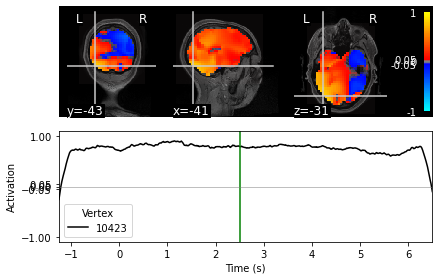

same 2.6000000000000005
Fixing initial time: 2.6000000000000005 sec
Showing: t = 2.600 s, (-41.1, -48.5, -26.4) mm, [7, 7, 9] vox, 11663 vertex


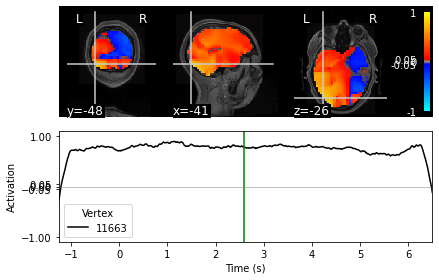

same 2.7000000000000006
Fixing initial time: 2.7000000000000006 sec
Showing: t = 2.700 s, (-41.1, -43.5, -31.4) mm, [7, 8, 8] vox, 10423 vertex


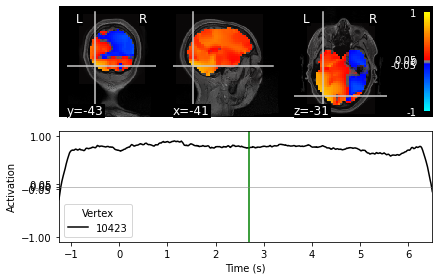

same 2.8000000000000007
Fixing initial time: 2.8000000000000007 sec
Showing: t = 2.800 s, (-41.1, -43.5, -31.4) mm, [7, 8, 8] vox, 10423 vertex


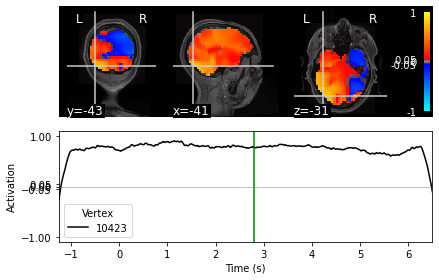

same 2.900000000000001
Fixing initial time: 2.900000000000001 sec
Showing: t = 2.900 s, (-41.1, -43.5, -31.4) mm, [7, 8, 8] vox, 10423 vertex


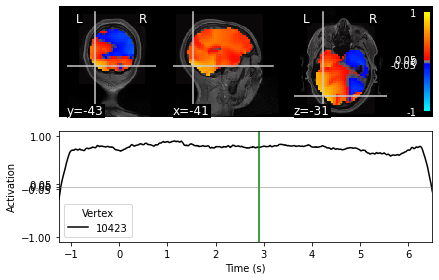

same 3.000000000000001
Fixing initial time: 3.000000000000001 sec
Showing: t = 3.000 s, (-56.1, -23.5, -26.4) mm, [4, 12, 9] vox, 11815 vertex


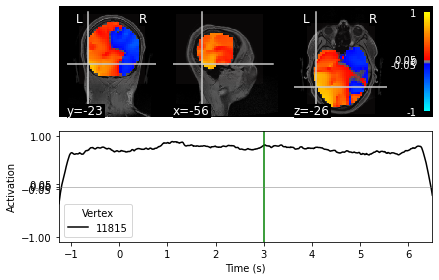

same 3.100000000000001
Fixing initial time: 3.100000000000001 sec
Showing: t = 3.100 s, (-56.1, -23.5, -26.4) mm, [4, 12, 9] vox, 11815 vertex


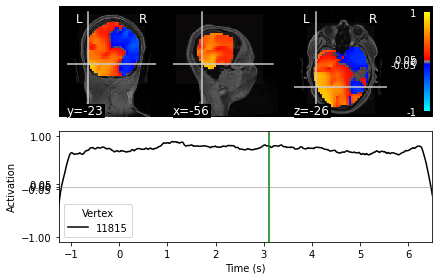

same 3.200000000000001
Fixing initial time: 3.200000000000001 sec
Showing: t = 3.200 s, (-41.1, -48.5, -26.4) mm, [7, 7, 9] vox, 11663 vertex


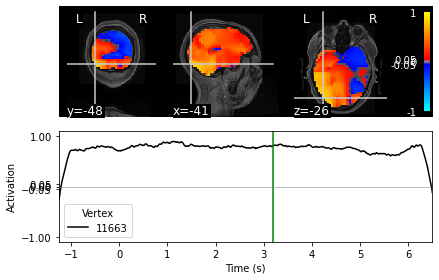

same 3.300000000000001
Fixing initial time: 3.300000000000001 sec
Showing: t = 3.300 s, (-41.1, -48.5, -26.4) mm, [7, 7, 9] vox, 11663 vertex


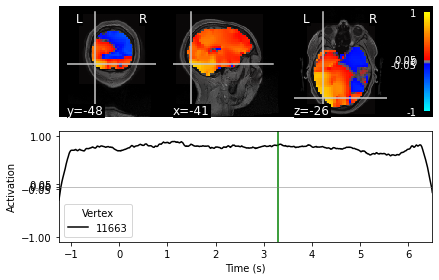

same 3.4000000000000012
Fixing initial time: 3.4000000000000012 sec
Showing: t = 3.400 s, (-51.1, -28.5, -31.4) mm, [5, 11, 8] vox, 10514 vertex


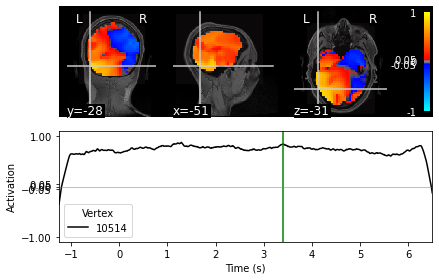

same 3.5000000000000013
Fixing initial time: 3.5000000000000013 sec
Showing: t = 3.500 s, (-41.1, -43.5, -31.4) mm, [7, 8, 8] vox, 10423 vertex


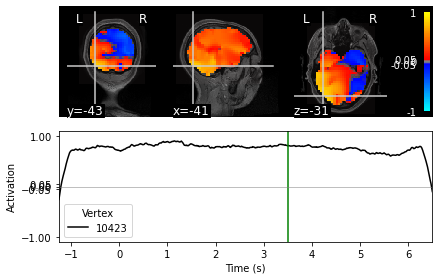

same 3.6000000000000014
Fixing initial time: 3.6000000000000014 sec
Showing: t = 3.600 s, (-41.1, -33.5, -36.4) mm, [7, 10, 7] vox, 9214 vertex


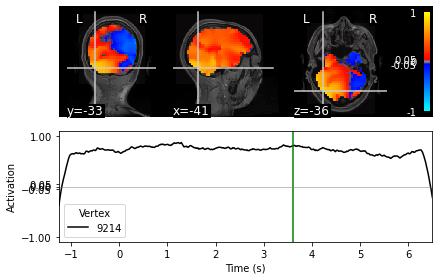

same 3.7000000000000015
Fixing initial time: 3.7000000000000015 sec
Showing: t = 3.700 s, (-46.1, -28.5, -36.4) mm, [6, 11, 7] vox, 9244 vertex


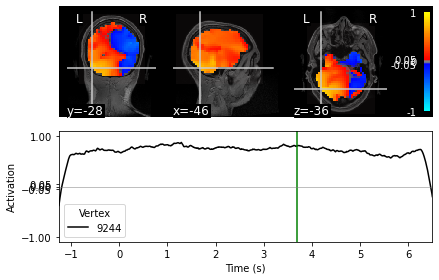

same 3.8000000000000016
Fixing initial time: 3.8000000000000016 sec
Showing: t = 3.800 s, (-41.1, -43.5, -31.4) mm, [7, 8, 8] vox, 10423 vertex


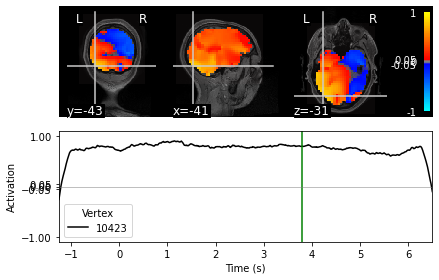

same 3.9000000000000017
Fixing initial time: 3.9000000000000017 sec
Showing: t = 3.900 s, (-41.1, -43.5, -31.4) mm, [7, 8, 8] vox, 10423 vertex


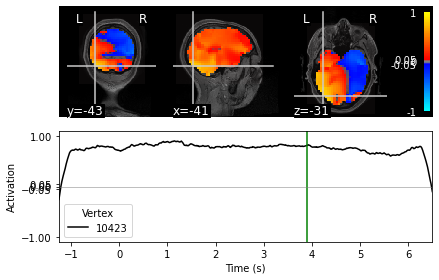

different 2.0
Fixing initial time: 2.0 sec
Showing: t = 2.000 s, (-56.1, -8.5, -36.4) mm, [4, 15, 7] vox, 9366 vertex


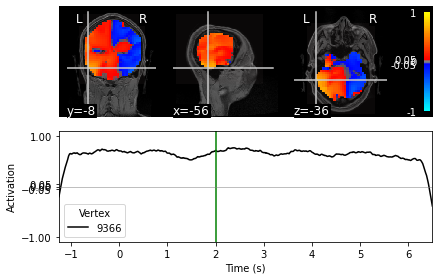

different 2.1
Fixing initial time: 2.1 sec
Showing: t = 2.100 s, (-41.1, -28.5, -31.4) mm, [7, 11, 8] vox, 10516 vertex


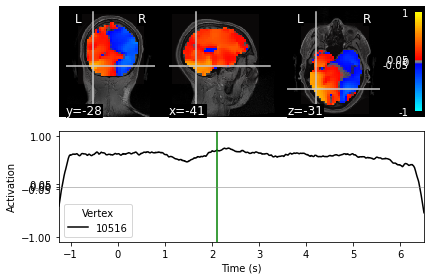

different 2.2
Fixing initial time: 2.2 sec
Showing: t = 2.200 s, (-41.1, -28.5, -31.4) mm, [7, 11, 8] vox, 10516 vertex


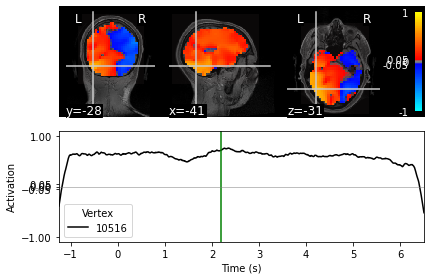

different 2.3000000000000003
Fixing initial time: 2.3000000000000003 sec
Showing: t = 2.300 s, (-56.1, -23.5, -26.4) mm, [4, 12, 9] vox, 11815 vertex


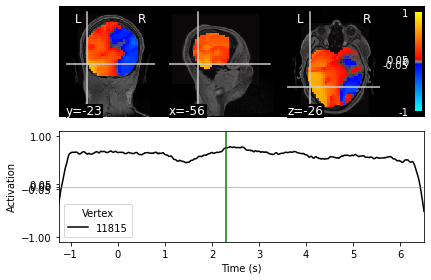

different 2.4000000000000004
Fixing initial time: 2.4000000000000004 sec
Showing: t = 2.400 s, (-56.1, -23.5, -26.4) mm, [4, 12, 9] vox, 11815 vertex


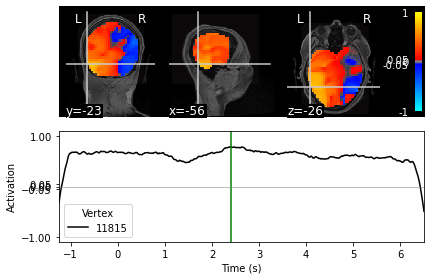

different 2.5000000000000004
Fixing initial time: 2.5000000000000004 sec
Showing: t = 2.500 s, (-56.1, -23.5, -26.4) mm, [4, 12, 9] vox, 11815 vertex


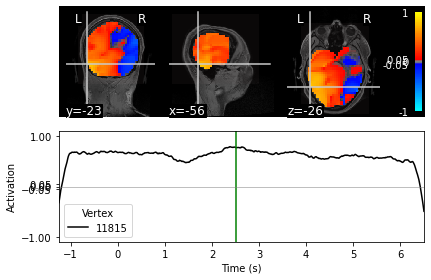

different 2.6000000000000005
Fixing initial time: 2.6000000000000005 sec
Showing: t = 2.600 s, (-56.1, -23.5, -26.4) mm, [4, 12, 9] vox, 11815 vertex


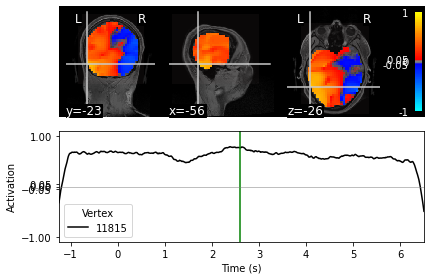

different 2.7000000000000006
Fixing initial time: 2.7000000000000006 sec
Showing: t = 2.700 s, (-56.1, -23.5, -26.4) mm, [4, 12, 9] vox, 11815 vertex


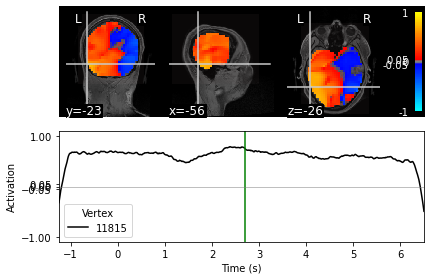

different 2.8000000000000007
Fixing initial time: 2.8000000000000007 sec
Showing: t = 2.800 s, (-56.1, -23.5, -26.4) mm, [4, 12, 9] vox, 11815 vertex


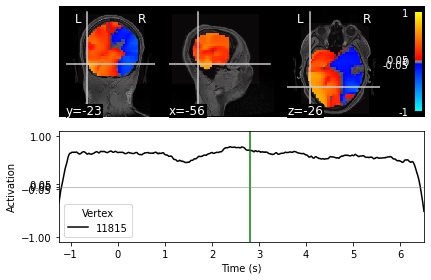

different 2.900000000000001
Fixing initial time: 2.900000000000001 sec
Showing: t = 2.900 s, (-56.1, -8.5, -36.4) mm, [4, 15, 7] vox, 9366 vertex


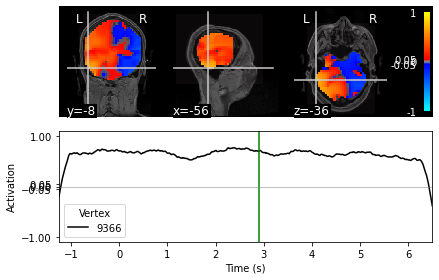

different 3.000000000000001
Fixing initial time: 3.000000000000001 sec
Showing: t = 3.000 s, (-51.1, -23.5, -31.4) mm, [5, 12, 8] vox, 10545 vertex


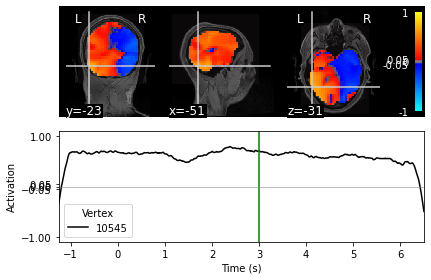

different 3.100000000000001
Fixing initial time: 3.100000000000001 sec
Showing: t = 3.100 s, (-51.1, -23.5, -31.4) mm, [5, 12, 8] vox, 10545 vertex


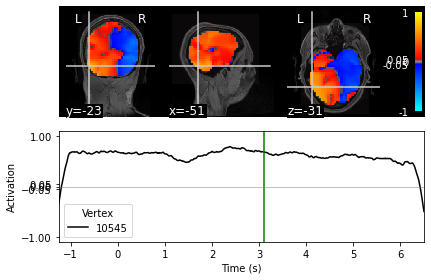

different 3.200000000000001
Fixing initial time: 3.200000000000001 sec
Showing: t = 3.200 s, (-56.1, -23.5, -26.4) mm, [4, 12, 9] vox, 11815 vertex


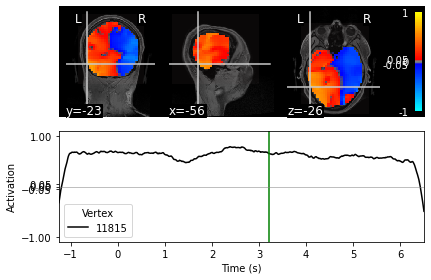

different 3.300000000000001
Fixing initial time: 3.300000000000001 sec
Showing: t = 3.300 s, (-56.1, -23.5, -26.4) mm, [4, 12, 9] vox, 11815 vertex


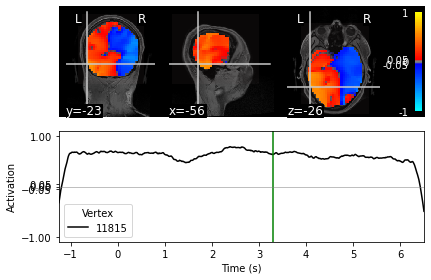

different 3.4000000000000012
Fixing initial time: 3.4000000000000012 sec
Showing: t = 3.400 s, (48.9, -43.5, -1.4) mm, [25, 8, 14] vox, 18067 vertex


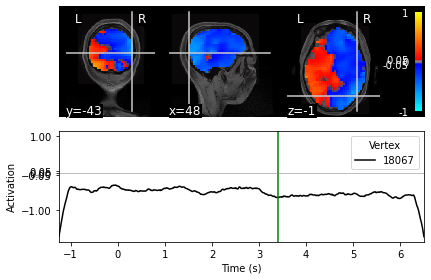

different 3.5000000000000013
Fixing initial time: 3.5000000000000013 sec
Showing: t = 3.500 s, (-56.1, -8.5, -36.4) mm, [4, 15, 7] vox, 9366 vertex


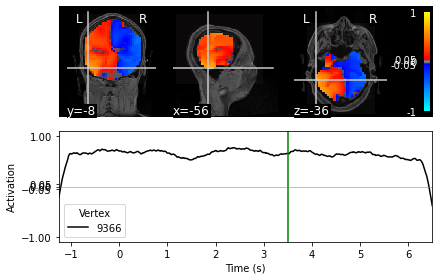

different 3.6000000000000014
Fixing initial time: 3.6000000000000014 sec
Showing: t = 3.600 s, (-56.1, -8.5, -36.4) mm, [4, 15, 7] vox, 9366 vertex


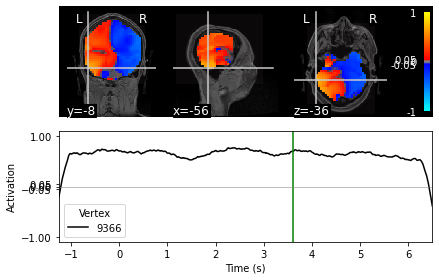

different 3.7000000000000015
Fixing initial time: 3.7000000000000015 sec
Showing: t = 3.700 s, (-56.1, -8.5, -36.4) mm, [4, 15, 7] vox, 9366 vertex


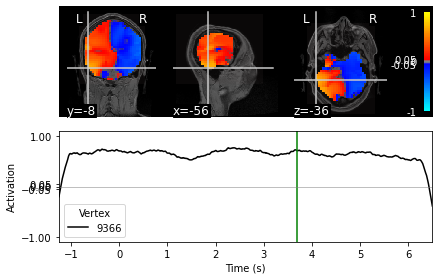

different 3.8000000000000016
Fixing initial time: 3.8000000000000016 sec
Showing: t = 3.800 s, (-56.1, -8.5, -36.4) mm, [4, 15, 7] vox, 9366 vertex


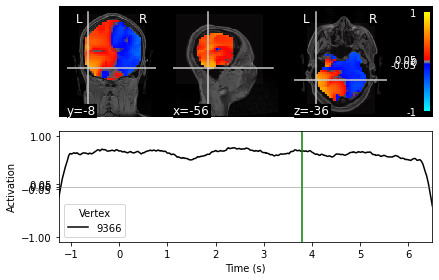

different 3.9000000000000017
Fixing initial time: 3.9000000000000017 sec
Showing: t = 3.900 s, (-56.1, -8.5, -36.4) mm, [4, 15, 7] vox, 9366 vertex


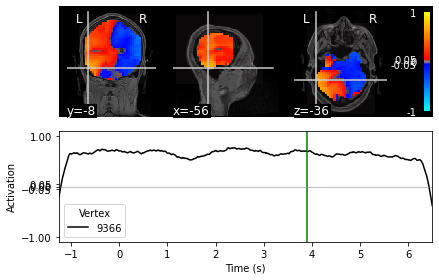

inverted 2.0
Fixing initial time: 2.0 sec
Showing: t = 2.000 s, (-51.1, -23.5, -31.4) mm, [5, 12, 8] vox, 10545 vertex


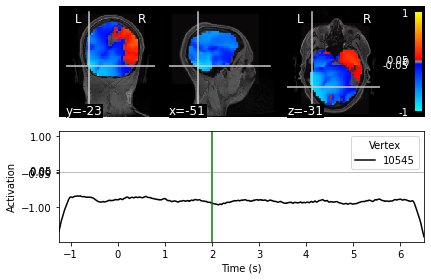

inverted 2.1
Fixing initial time: 2.1 sec
Showing: t = 2.100 s, (-56.1, -23.5, -26.4) mm, [4, 12, 9] vox, 11815 vertex


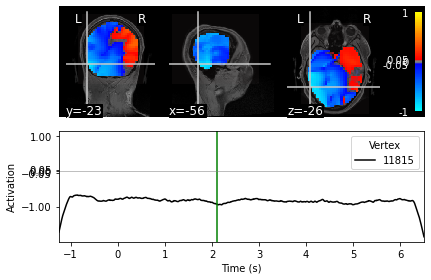

inverted 2.2
Fixing initial time: 2.2 sec
Showing: t = 2.200 s, (-56.1, -13.5, -31.4) mm, [4, 14, 8] vox, 10606 vertex


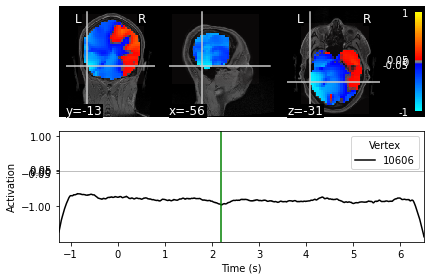

inverted 2.3000000000000003
Fixing initial time: 2.3000000000000003 sec
Showing: t = 2.300 s, (-56.1, -8.5, -36.4) mm, [4, 15, 7] vox, 9366 vertex


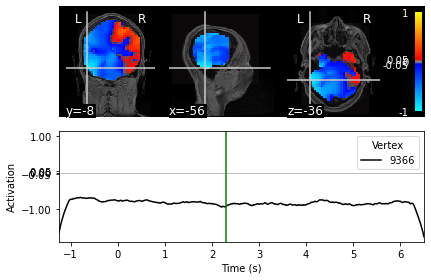

inverted 2.4000000000000004
Fixing initial time: 2.4000000000000004 sec
Showing: t = 2.400 s, (-56.1, -8.5, -36.4) mm, [4, 15, 7] vox, 9366 vertex


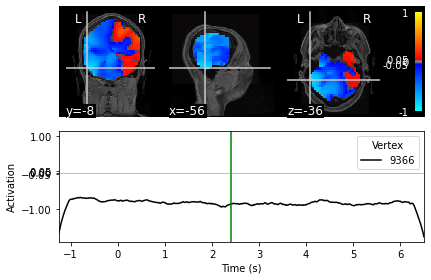

inverted 2.5000000000000004
Fixing initial time: 2.5000000000000004 sec
Showing: t = 2.500 s, (-56.1, -8.5, -36.4) mm, [4, 15, 7] vox, 9366 vertex


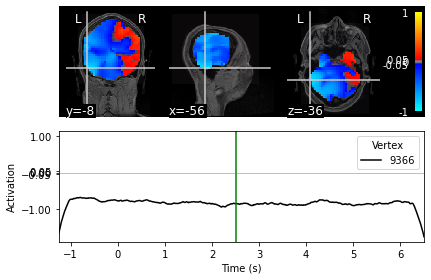

inverted 2.6000000000000005
Fixing initial time: 2.6000000000000005 sec
Showing: t = 2.600 s, (-56.1, -8.5, -36.4) mm, [4, 15, 7] vox, 9366 vertex


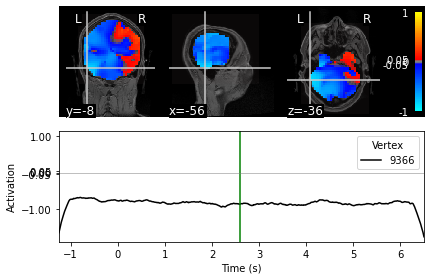

inverted 2.7000000000000006
Fixing initial time: 2.7000000000000006 sec
Showing: t = 2.700 s, (-56.1, -8.5, -36.4) mm, [4, 15, 7] vox, 9366 vertex


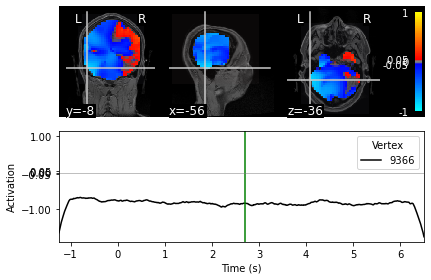

inverted 2.8000000000000007
Fixing initial time: 2.8000000000000007 sec
Showing: t = 2.800 s, (-56.1, -8.5, -36.4) mm, [4, 15, 7] vox, 9366 vertex


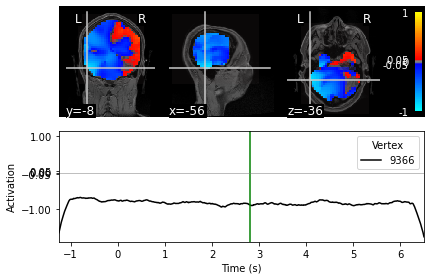

inverted 2.900000000000001
Fixing initial time: 2.900000000000001 sec
Showing: t = 2.900 s, (-56.1, -8.5, -36.4) mm, [4, 15, 7] vox, 9366 vertex


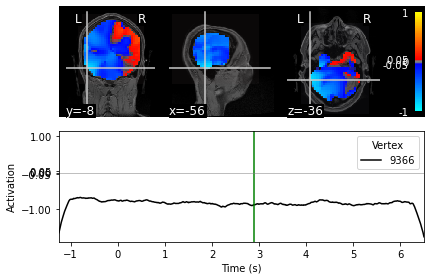

inverted 3.000000000000001
Fixing initial time: 3.000000000000001 sec
Showing: t = 3.000 s, (-56.1, -8.5, -36.4) mm, [4, 15, 7] vox, 9366 vertex


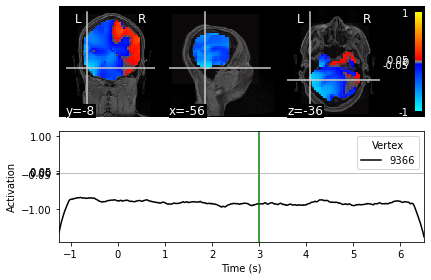

inverted 3.100000000000001
Fixing initial time: 3.100000000000001 sec
Showing: t = 3.100 s, (-56.1, -8.5, -36.4) mm, [4, 15, 7] vox, 9366 vertex


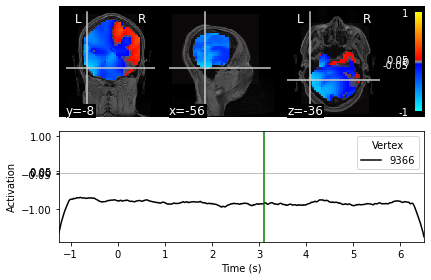

inverted 3.200000000000001
Fixing initial time: 3.200000000000001 sec
Showing: t = 3.200 s, (-56.1, -8.5, -36.4) mm, [4, 15, 7] vox, 9366 vertex


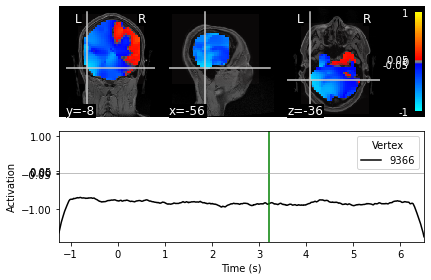

inverted 3.300000000000001
Fixing initial time: 3.300000000000001 sec
Showing: t = 3.300 s, (-56.1, -13.5, -31.4) mm, [4, 14, 8] vox, 10606 vertex


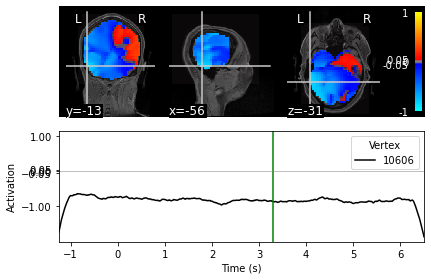

inverted 3.4000000000000012
Fixing initial time: 3.4000000000000012 sec
Showing: t = 3.400 s, (-56.1, -13.5, -31.4) mm, [4, 14, 8] vox, 10606 vertex


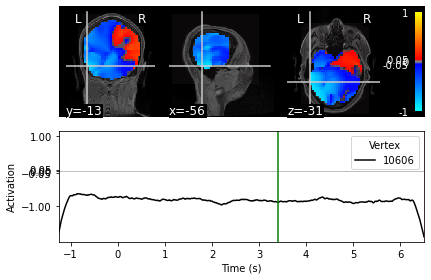

inverted 3.5000000000000013
Fixing initial time: 3.5000000000000013 sec
Showing: t = 3.500 s, (-56.1, -8.5, -36.4) mm, [4, 15, 7] vox, 9366 vertex


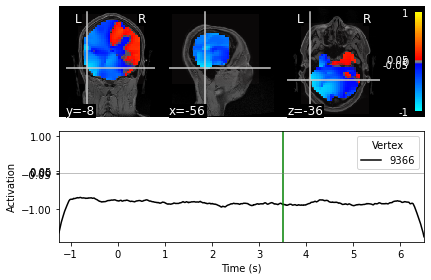

inverted 3.6000000000000014
Fixing initial time: 3.6000000000000014 sec
Showing: t = 3.600 s, (-56.1, -8.5, -36.4) mm, [4, 15, 7] vox, 9366 vertex


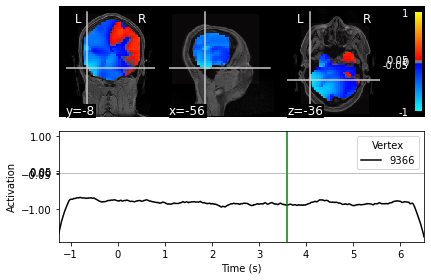

inverted 3.7000000000000015
Fixing initial time: 3.7000000000000015 sec
Showing: t = 3.700 s, (-56.1, -8.5, -36.4) mm, [4, 15, 7] vox, 9366 vertex


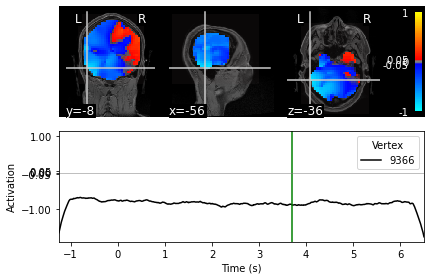

inverted 3.8000000000000016
Fixing initial time: 3.8000000000000016 sec
Showing: t = 3.800 s, (-56.1, -8.5, -36.4) mm, [4, 15, 7] vox, 9366 vertex


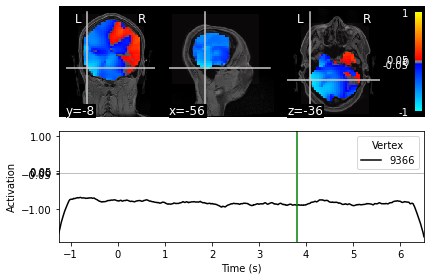

inverted 3.9000000000000017
Fixing initial time: 3.9000000000000017 sec
Showing: t = 3.900 s, (-56.1, -8.5, -36.4) mm, [4, 15, 7] vox, 9366 vertex


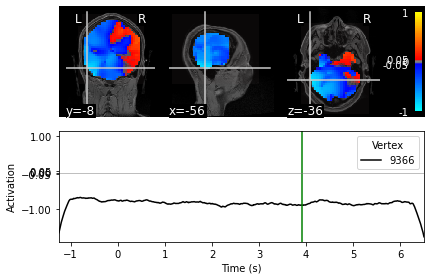

other 2.0
Fixing initial time: 2.0 sec
Showing: t = 2.000 s, (-56.1, -8.5, -36.4) mm, [4, 15, 7] vox, 9366 vertex


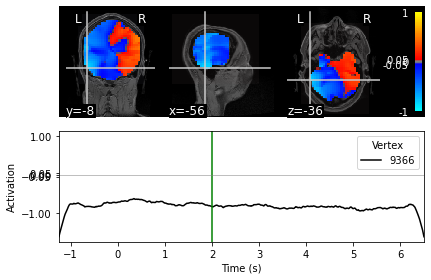

other 2.1
Fixing initial time: 2.1 sec
Showing: t = 2.100 s, (-56.1, -13.5, -31.4) mm, [4, 14, 8] vox, 10606 vertex


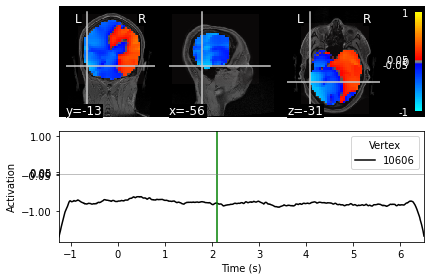

other 2.2
Fixing initial time: 2.2 sec
Showing: t = 2.200 s, (-56.1, -8.5, -31.4) mm, [4, 15, 8] vox, 10637 vertex


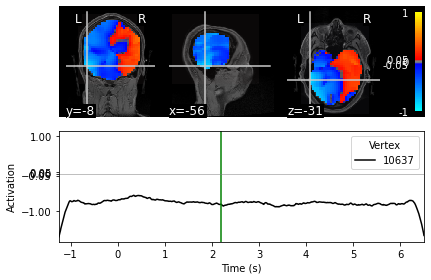

other 2.3000000000000003
Fixing initial time: 2.3000000000000003 sec
Showing: t = 2.300 s, (-56.1, -13.5, -31.4) mm, [4, 14, 8] vox, 10606 vertex


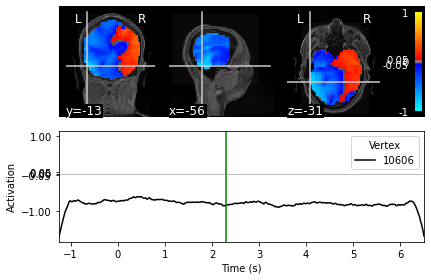

other 2.4000000000000004
Fixing initial time: 2.4000000000000004 sec
Showing: t = 2.400 s, (-56.1, -13.5, -31.4) mm, [4, 14, 8] vox, 10606 vertex


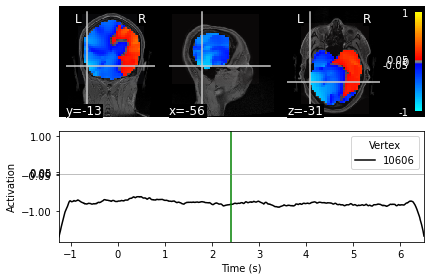

other 2.5000000000000004
Fixing initial time: 2.5000000000000004 sec
Showing: t = 2.500 s, (-56.1, -8.5, -36.4) mm, [4, 15, 7] vox, 9366 vertex


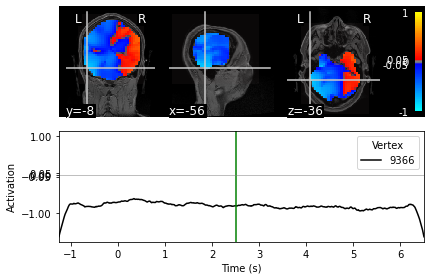

other 2.6000000000000005
Fixing initial time: 2.6000000000000005 sec
Showing: t = 2.600 s, (-56.1, -23.5, -26.4) mm, [4, 12, 9] vox, 11815 vertex


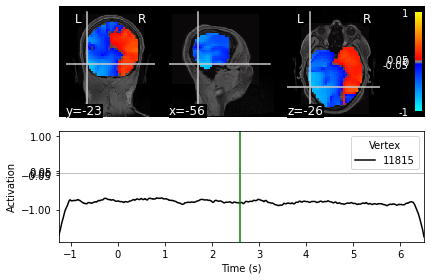

other 2.7000000000000006
Fixing initial time: 2.7000000000000006 sec
Showing: t = 2.700 s, (-56.1, -23.5, -26.4) mm, [4, 12, 9] vox, 11815 vertex


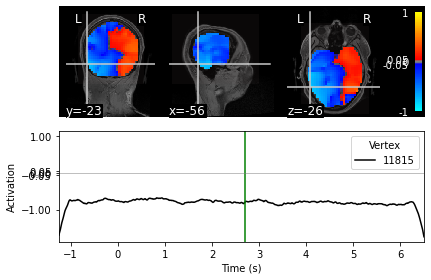

other 2.8000000000000007
Fixing initial time: 2.8000000000000007 sec
Showing: t = 2.800 s, (-51.1, -28.5, -31.4) mm, [5, 11, 8] vox, 10514 vertex


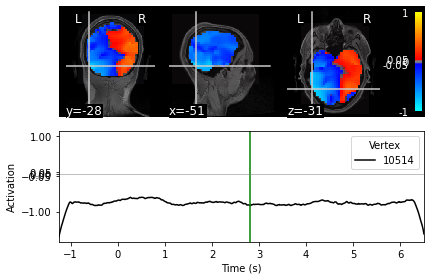

other 2.900000000000001
Fixing initial time: 2.900000000000001 sec
Showing: t = 2.900 s, (-51.1, -28.5, -31.4) mm, [5, 11, 8] vox, 10514 vertex


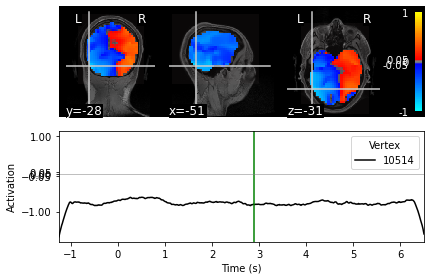

other 3.000000000000001
Fixing initial time: 3.000000000000001 sec
Showing: t = 3.000 s, (-51.1, -28.5, -31.4) mm, [5, 11, 8] vox, 10514 vertex


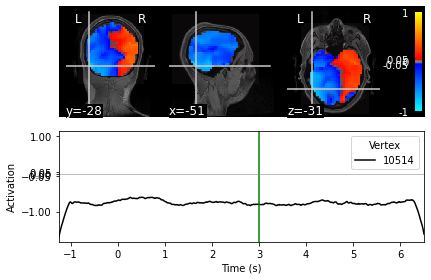

other 3.100000000000001
Fixing initial time: 3.100000000000001 sec
Showing: t = 3.100 s, (-56.1, -8.5, -31.4) mm, [4, 15, 8] vox, 10637 vertex


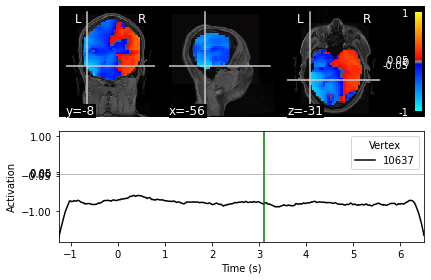

other 3.200000000000001
Fixing initial time: 3.200000000000001 sec
Showing: t = 3.200 s, (-41.1, -8.5, -51.4) mm, [7, 15, 4] vox, 5556 vertex


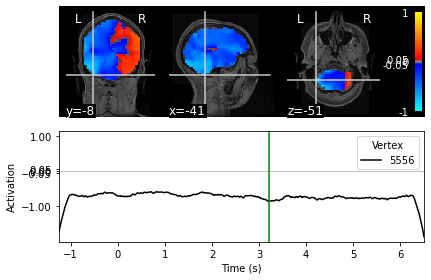

other 3.300000000000001
Fixing initial time: 3.300000000000001 sec
Showing: t = 3.300 s, (-56.1, -13.5, -31.4) mm, [4, 14, 8] vox, 10606 vertex


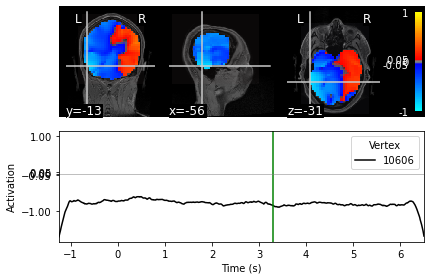

other 3.4000000000000012
Fixing initial time: 3.4000000000000012 sec
Showing: t = 3.400 s, (-56.1, -13.5, -31.4) mm, [4, 14, 8] vox, 10606 vertex


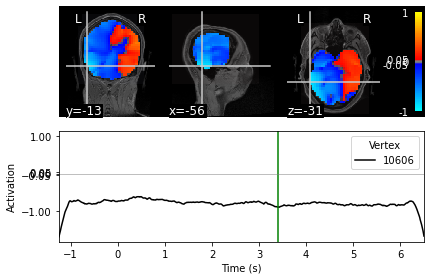

other 3.5000000000000013
Fixing initial time: 3.5000000000000013 sec
Showing: t = 3.500 s, (-56.1, -8.5, -36.4) mm, [4, 15, 7] vox, 9366 vertex


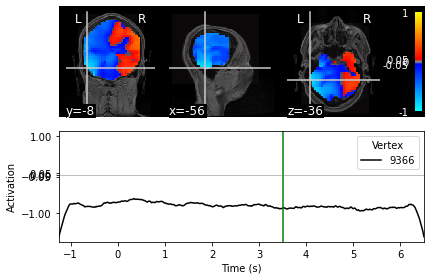

other 3.6000000000000014
Fixing initial time: 3.6000000000000014 sec
Showing: t = 3.600 s, (-56.1, -8.5, -36.4) mm, [4, 15, 7] vox, 9366 vertex


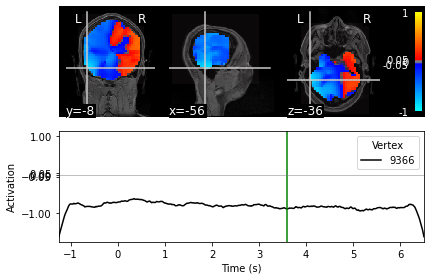

other 3.7000000000000015
Fixing initial time: 3.7000000000000015 sec
Showing: t = 3.700 s, (-56.1, -8.5, -36.4) mm, [4, 15, 7] vox, 9366 vertex


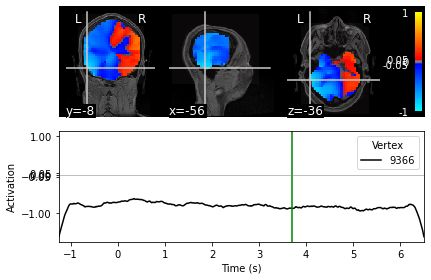

other 3.8000000000000016
Fixing initial time: 3.8000000000000016 sec
Showing: t = 3.800 s, (-56.1, -8.5, -36.4) mm, [4, 15, 7] vox, 9366 vertex


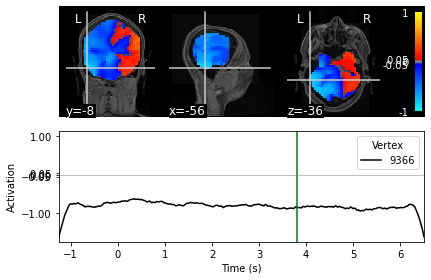

other 3.9000000000000017
Fixing initial time: 3.9000000000000017 sec
Showing: t = 3.900 s, (-56.1, -8.5, -36.4) mm, [4, 15, 7] vox, 9366 vertex


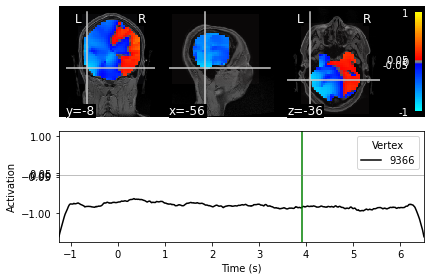

In [9]:
# Plot 1 stc
for s in all_stc:
        plot_times = np.arange(2,4,0.1)     
        for pt in plot_times:
            print('{} {}'.format(s,pt))
            brain = all_stc[s].plot(subjects_dir=subs_dir,initial_time = pt,clim={'kind': 'value', 'pos_lims': [0,0.05,1]},#time_viewer=True,
                                    mode = 'stat_map',src = src)